the first step to analysis of XL code in the jupyter environment is to upload your data to the workspace, do this using up arrow on the left of screen.  once the data is uploaded we need to ensure that the notebook works with the nominated data set - upload your code and change out the demo dataset 'brian' to your own.   if you are unsure that your notebook has correctly uploaded the following code will show you that the xl file you wish to analyse connected to your workbook - the output is gobledygook- its just there to show the rest of the code will work - only run this code if you are unsure of the connection.  

this notebook is based upon the information found here https://www.dataquest.io/blog/excel-and-pandas/ 

In [1]:
#with open("HopelsSquareSurv.xls", "rb") as f:
    #fstr = f.read()
#print(fstr)

start to install the requirements - most of the required packages should already be installed 

In [2]:
!pip install xlrd

    100% |████████████████████████████████| 112kB 2.8MB/s 


In [4]:
import numpy as np
import pandas as pd
import requests
import collections
import IPython.display as Disp
import xml.etree.ElementTree as ET
from io import StringIO
from lxml import etree, objectify

import os

here we are naming our file to make the code easier to use

In [5]:
excel_file = "HopelsSquareSurv.xls"


In [6]:
HopelsSquareSurv = pd.read_excel(excel_file)

this code will showcase what is in our datasheet prior to futher analysis - the code will show the top 5 lines from all colums 

In [7]:
HopelsSquareSurv.head()

,DIRECTION,SESSION,DATE,SQUARE,TREATMENT,QUAD,DEPTH,URCHIN,LIMPET,ABALONE,...,SARG,GIFF,DRIFT,ANNUAL,FILAMENTOUS,PERENNIAL,TOTALGWMAC,TOTALGWOMAC,URCHINCAT,LIMPETCAT
0,STH,1,4.5.94,1S,C,LF,3.370,4.0,1.0,2.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,C
1,STH,1,4.5.94,1S,C,RF,3.370,11.0,5.0,3.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,C
2,STH,1,4.5.94,1S,C,RB,4.309,3.0,6.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,C
3,STH,1,4.5.94,1S,C,LB,4.309,11.0,5.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,C
4,STH,1,4.5.94,1S,C,DM,3.683,4.0,1.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,C


the next line of code will isolate each sheet of the XL file - *note our dataset is only one sheet see https://www.dataquest.io/blog/excel-and-pandas/ for information on using multisheet datasets

In [8]:
HopelsSquareSurv1 = pd.read_excel(excel_file, sheet_name=0, index_col=0)
HopelsSquareSurv1.head()

,SESSION,DATE,SQUARE,TREATMENT,QUAD,DEPTH,URCHIN,LIMPET,ABALONE,CORALLINE,...,SARG,GIFF,DRIFT,ANNUAL,FILAMENTOUS,PERENNIAL,TOTALGWMAC,TOTALGWOMAC,URCHINCAT,LIMPETCAT
DIRECTION,,,,,,,,,,,,,,,,,,,,,
STH,1,4.5.94,1S,C,LF,3.370,4.0,1.0,2.0,10.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,C
STH,1,4.5.94,1S,C,RF,3.370,11.0,5.0,3.0,5.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,C
STH,1,4.5.94,1S,C,RB,4.309,3.0,6.0,0.0,4.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,C
STH,1,4.5.94,1S,C,LB,4.309,11.0,5.0,1.0,4.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,C
STH,1,4.5.94,1S,C,DM,3.683,4.0,1.0,0.0,5.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,C


here we can isolate a single column to show the values - using this function we can see the top 30 depths from the over 1100 lines of data

In [9]:
sorted_by_DEPTH = HopelsSquareSurv.sort_values(['DEPTH'], ascending=False)
sorted_by_DEPTH["DEPTH"].head(30)

894     5.486
885     5.486
1044    5.300
1055    5.300
1056    5.200
755     5.200
1046    5.200
573     5.200
1054    5.200
946     5.182
955     5.182
884     5.182
886     5.182
887     5.182
901     5.182
888     5.182
893     5.182
895     5.182
896     5.182
613     5.100
568     5.100
1115    5.100
1106    5.100
562     5.100
1045    5.100
1066    5.100
588     5.000
486     5.000
563     5.000
1114    5.000
Name: DEPTH, dtype: float64

The next sets of code will show how to sort the data and plot it - the graphs below show the frequencies of depths in the data

In [10]:
import matplotlib.pyplot as plt

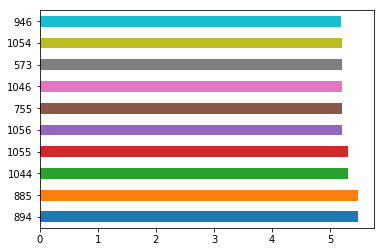

In [11]:
sorted_by_DEPTH["DEPTH"].head(10).plot(kind="barh")
plt.show()

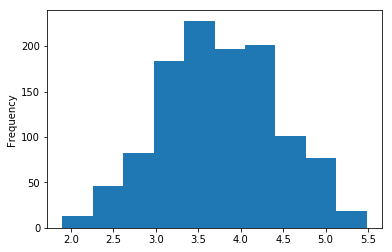

In [12]:
HopelsSquareSurv['DEPTH'].plot(kind="hist")
plt.show()

The Describe function starts to show statistical analysis from our data, including counts, means, median and standard deviation

In [13]:
HopelsSquareSurv.describe()

,SESSION,DEPTH,URCHIN,LIMPET,ABALONE,CORALLINE,SPONGE,SCUNGE,COLPOMEN,CYST,MACRO,SARG,GIFF,DRIFT,ANNUAL,FILAMENTOUS,PERENNIAL,TOTALGWMAC,TOTALGWOMAC
count,1150.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1150.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,4.052174,3.751313,2.425958,3.318815,0.577526,11.361498,1.963415,8.557491,1.047038,0.879791,1.031359,1.135652,1.176829,0.747387,2.695122,5.205575,2.949477,11.453833,10.422474
std,2.000189,0.683766,2.588066,6.304903,1.063011,10.709161,6.600604,12.203652,3.486362,2.678568,4.082078,3.940245,3.784185,2.786933,6.094668,9.974225,7.425367,14.153615,13.591310
min,1.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.300000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.700000,2.000000,1.000000,0.000000,10.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
75%,6.000000,4.267000,4.000000,4.000000,1.000000,15.000000,0.250000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,2.000000,18.000000,16.000000
max,7.000000,5.486000,14.000000,49.000000,15.000000,48.000000,50.000000,52.000000,35.000000,30.000000,40.000000,40.000000,30.000000,40.000000,55.000000,50.000000,84.000000,84.000000,84.000000


We can also isolate single columns to show the same information

In [15]:
HopelsSquareSurv['DEPTH'].mean()

3.7513127177700354

In [16]:
HopelsSquareSurv['DEPTH'].min()

1.9

In [17]:
HopelsSquareSurv['SESSION'].min()


1

In [18]:
HopelsSquareSurv['SESSION'].max()

7

Sometimes we dont need to see everything in the file - this command will show the first 6 columns on the table

In [20]:
HopelsSquareSurv_subset_columns = pd.read_excel(excel_file, usecols=6)
HopelsSquareSurv_subset_columns.head()

,DIRECTION,SESSION,DATE,SQUARE,TREATMENT,QUAD,DEPTH
0,STH,1,4.5.94,1S,C,LF,3.370
1,STH,1,4.5.94,1S,C,RF,3.370
2,STH,1,4.5.94,1S,C,RB,4.309
3,STH,1,4.5.94,1S,C,LB,4.309
4,STH,1,4.5.94,1S,C,DM,3.683


In [22]:
brian_subset_columns = pd.read_excel(excel_file, usecols='1,3,5,6,13')
brian_subset_columns.head()
#not sure why this isnt working yet

""


Pivot tables - here we can create and plot basic taples to visualise the data. the following code will show the numbers of Limpet found at depths

In [46]:
HopelsSquareSurv_subset = HopelsSquareSurv[['LIMPET', 'DEPTH',]]
HopelsSquareSurv_subset.head()

,LIMPET,DEPTH
0,1.0,3.370
1,5.0,3.370
2,6.0,4.309
3,5.0,4.309
4,1.0,3.683


In [52]:
Limpet_Depth = HopelsSquareSurv_subset.pivot_table(index=['LIMPET'])
Limpet_Depth.head()

,DEPTH
LIMPET,
0.0,4.089422
1.0,3.805582
2.0,3.703389
3.0,3.363982
4.0,3.591914


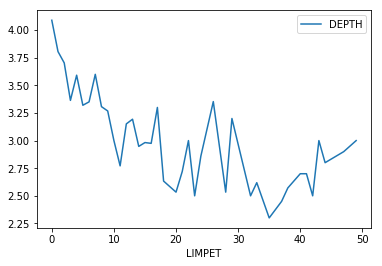

In [53]:
Limpet_Depth.plot()
plt.show()

In [41]:
date_depth_direction_subset = HopelsSquareSurv[['DIRECTION','SESSION', 'DEPTH']]
date_depth_direction_subset.head()

,DIRECTION,SESSION,DEPTH
0,STH,1,3.370
1,STH,1,3.370
2,STH,1,4.309
3,STH,1,4.309
4,STH,1,3.683


In [54]:
date_by_depth_direction = date_depth_direction_subset.pivot_table(index=['DEPTH'])
date_by_depth_direction.head()

,SESSION
DEPTH,
1.9,3.000000
2.0,3.000000
2.1,2.333333
2.2,3.000000
2.3,3.000000


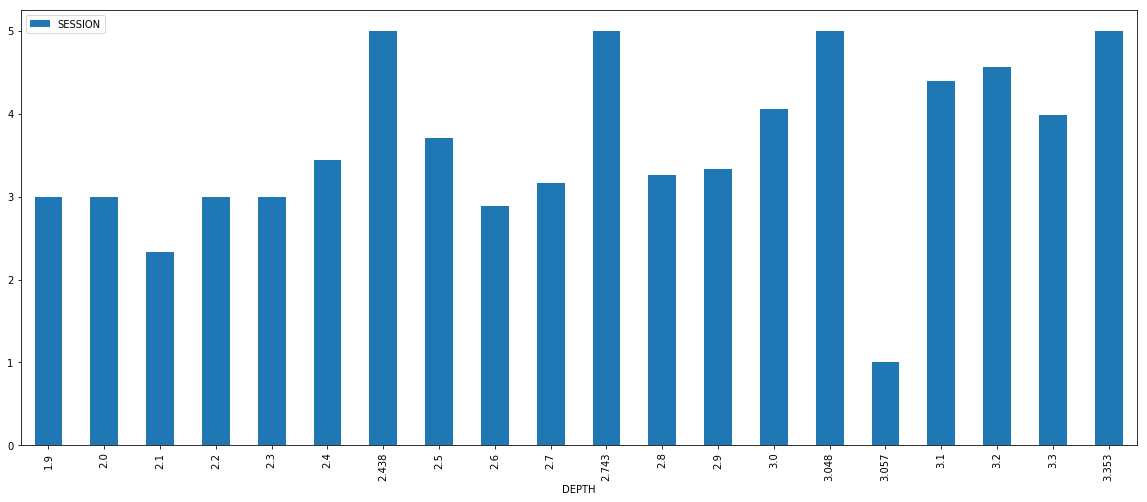

In [55]:
date_by_depth_direction.head(20).plot(kind='bar', figsize=(20,8))
plt.show()